# Network Dynamics and Graph - Politecnico di Torino - Hafez Ghaemi - S289963
## HW2 - Exercise 2

In [28]:
import numpy as np 
import networkx as nx 
import matplotlib.pyplot as plt 

In [29]:
Lambda = np.array([
[0, 2/5, 1/5, 0, 0],
[0, 0, 3/4, 1/4, 0],
[1/2, 0, 0, 1/2, 0],
[0, 0, 1/3, 0, 2/3],
[0, 1/3, 0, 1/3, 0],
])

In [30]:
omega = Lambda@np.ones(Lambda.shape[0])
D = np.diag(omega)
P = np.linalg.inv(D)@Lambda
P

array([[0.        , 0.66666667, 0.33333333, 0.        , 0.        ],
       [0.        , 0.        , 0.75      , 0.25      , 0.        ],
       [0.5       , 0.        , 0.        , 0.5       , 0.        ],
       [0.        , 0.        , 0.33333333, 0.        , 0.66666667],
       [0.        , 0.5       , 0.        , 0.5       , 0.        ]])

In [31]:
omega_star = np.max(omega)
Q = Lambda/omega_star 
Q = Q + np.diag(np.ones(len(omega))-np.sum(Q,axis=1))

values,vectors = np.linalg.eig(Q.T)
index = np.argmax(values.real)

pi_bar = vectors[:,index].real
pi_bar = pi_bar/np.sum(pi_bar)
print('Q: ', Q)
print("pi_bar=", pi_bar)

Q:  [[0.4        0.4        0.2        0.         0.        ]
 [0.         0.         0.75       0.25       0.        ]
 [0.5        0.         0.         0.5        0.        ]
 [0.         0.         0.33333333 0.         0.66666667]
 [0.         0.33333333 0.         0.33333333 0.33333333]]
pi_bar= [0.18518519 0.14814815 0.22222222 0.22222222 0.22222222]


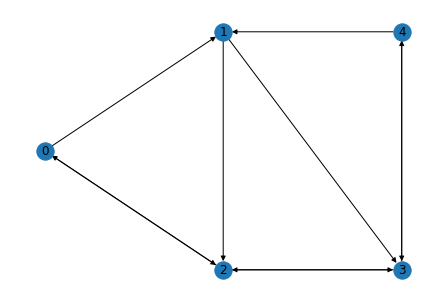

In [32]:
G = nx.DiGraph()

G.add_nodes_from([0, 1, 2, 3, 4])
G.add_edges_from([(1,2), (1, 3),  (0, 1), (4, 1), (3, 4), (4, 3), (0, 2), (2, 0), (2, 3), (3, 2)])


positions = {1: (1,1), 2: (1,-1), 3: (2,-1), 4: (2,1), 0: (0,0)}

nx.draw(G, positions, with_labels=True)

# a) particle perspective

In [33]:
n_particles = 100
n_simulations = 1000
return_times_particles = []

for p in range(n_particles): # simulate over 100 particles
    return_times = []

    for s in range(n_simulations): # simulate a walk  for each particle
        # Compute the cumulative sums of the rows of P
        P_cum = np.cumsum(P, axis=1)
        transition_time = 0
        pos = 1 # starting position (a)
        while True:
            # the next state to visit will be extracted according to the probabilities
            # stored in the row of P corresponding to the current state.
            pos = np.argwhere(P_cum[pos] > np.random.rand())[0][0]
            t_next = -np.log(np.random.rand())/omega[pos]
            # store the time instant of the current transition
            transition_time += t_next

            if pos == 1:
                break


        return_times.append(transition_time)
    print(np.mean(return_times))
    return_times_particles.append(np.mean(return_times))

6.757491737940816
6.863787971911937
6.626259880359024
6.581590711132999
6.980276667539607
6.6258626744774345
6.470979286244914
6.765882095558298
6.755064420878696
6.512825636250622
6.896796477279671
6.69514818085373
6.611151254977247
6.7648956230440325
6.687068711000511
6.92884706731203
6.928905904854099
7.071958999533174
6.840454212445264
6.4832779442033095
6.401697428384252
6.65331813174162
6.836715570230034
7.022946274896513
6.773057558602398
6.683270420366646
6.619000980634684
6.833625828038427
6.58141778119179
6.784063411315805
6.837360377121344
6.758937832249108
6.459056991104225
6.450212198849682
6.700785092644117
6.467833906210451
6.517202673920239
6.7056348704894955
6.9550176021768255
6.797105542600243
6.942275460966806
7.043241127410887
6.789336610679099
6.844754546409291
6.54951488125273
6.71665984816246
6.995039132885939
6.738108635515252
6.744537142252263
6.651686511881684
6.645540641437086
6.787087564421377
6.661775803064371
6.975585430565166
6.601281296305803
6.763605396

In [43]:
print("Average return time:")
np.mean(return_times_particles)

Average return time:


6.730745110192794

# b) node perspective

In [46]:
time_limit = 60
rate = 100
states = []
times = []
eps = 1e-16

node_states = np.array([100, 0, 0, 0, 0]) #node o has 100 particles
total_time = 0
node_probs = node_states/np.sum(node_states)
    
while total_time<time_limit:
    t_nexts = -np.log(np.random.rand(G.number_of_nodes()))/((node_states+eps)*omega)

    total_time += min(t_nexts) 

    sel_node = np.argmin(t_nexts) # select node based on the earliest clock tick

    des_node = np.random.choice(G.nodes(), p = P[sel_node, :]) # select destination based on probability to go from current node

    # change the states
    node_states[sel_node] -=1
    node_states[des_node] +=1
    
    node_probs = node_states/np.sum(node_states)
    
    times.append(total_time)
    states.append(node_states.tolist())

    print(node_states)

[99  1  0  0  0]
[98  2  0  0  0]
[97  3  0  0  0]
[96  3  1  0  0]
[95  4  1  0  0]
[94  4  2  0  0]
[93  5  2  0  0]
[92  6  2  0  0]
[91  7  2  0  0]
[90  7  3  0  0]
[91  7  2  0  0]
[90  7  3  0  0]
[89  8  3  0  0]
[88  9  3  0  0]
[87 10  3  0  0]
[86 11  3  0  0]
[85 11  4  0  0]
[84 11  5  0  0]
[83 12  5  0  0]
[83 11  6  0  0]
[83 10  7  0  0]
[84 10  6  0  0]
[83 10  7  0  0]
[84 10  6  0  0]
[83 10  7  0  0]
[83 10  6  1  0]
[82 11  6  1  0]
[81 11  7  1  0]
[80 11  8  1  0]
[79 12  8  1  0]
[78 13  8  1  0]
[77 14  8  1  0]
[78 14  7  1  0]
[78 13  8  1  0]
[77 13  9  1  0]
[77 12 10  1  0]
[77 12  9  2  0]
[76 12 10  2  0]
[77 12  9  2  0]
[76 13  9  2  0]
[75 13 10  2  0]
[74 14 10  2  0]
[73 15 10  2  0]
[72 15 11  2  0]
[71 15 12  2  0]
[70 16 12  2  0]
[69 17 12  2  0]
[68 17 13  2  0]
[68 17 14  1  0]
[67 18 14  1  0]
[66 19 14  1  0]
[65 20 14  1  0]
[65 19 15  1  0]
[66 19 14  1  0]
[65 19 15  1  0]
[65 18 16  1  0]
[65 17 17  1  0]
[64 18 17  1  0]
[63 18 18  1  

In [53]:
print('States')
s = np.mean(states[-1000:], axis=0)
print(s)
print(s/np.sum(s))

States
[16.327 16.163 21.15  23.599 22.761]
[0.16327 0.16163 0.2115  0.23599 0.22761]


In [54]:
print("pi bar")
pi_bar

pi bar


array([0.18518519, 0.14814815, 0.22222222, 0.22222222, 0.22222222])

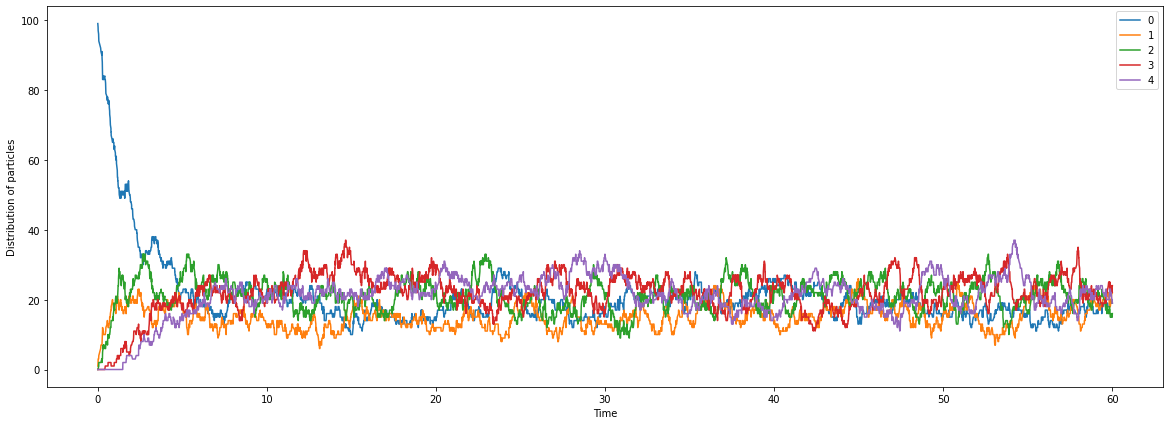

In [55]:
fig, ax = plt.subplots(figsize=(20,7)) 
for node in range(len(G)):
    plt.plot(times, np.array(states)[:,node], label=node)
ax.legend()
plt.xlabel('Time')
plt.ylabel('Distribution of particles')
plt.legend()
# plt.savefig("plot2b.eps",format='eps')